In [1]:
#GENERAL
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import ceil
import warnings
import feature_engine.missing_data_imputers as mdi
import category_encoders as ce
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gspec
from datetime import datetime

#SKLEARN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.preprocessing as prep
import sklearn.neighbors as neighb

In [2]:
data = pd.read_csv('H2.csv')

In [3]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [4]:
data.shape

(79330, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [7]:
#Changing the type of the last variable 

data['ReservationStatusDate'] = data['ReservationStatusDate'].apply(str)
data['ReservationStatusDate'] = data['ReservationStatusDate'].str[:4]
data['ReservationStatusDate'] = data['ReservationStatusDate'].apply(float)

In [8]:
numeric_features = ['IsCanceled','LeadTime','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','IsRepeatedGuest','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','Agent','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','ReservationStatusDate']
categorical_features = data.columns.drop(numeric_features).to_list()

In [9]:
# checking 2 outliers 
data['Babies'].sort_values()

0         0
52798     0
52795     0
52794     0
52793     0
         ..
57841     2
54003     2
44531     2
38596     9
6559     10
Name: Babies, Length: 79330, dtype: int64

In [10]:
data['Children'].sort_values()

0        0.0
51500    0.0
51499    0.0
51498    0.0
51497    0.0
        ... 
54714    3.0
540      NaN
607      NaN
619      NaN
1100     NaN
Name: Children, Length: 79330, dtype: float64

In [11]:
data[numeric_features]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,0,6,2015,27,1,0,2,1,0.0,0,0,0,0,0,6,0,0.00,0,0,2015.0
1,1,88,2015,27,1,0,4,2,0.0,0,0,0,0,0,9,0,76.50,0,1,2015.0
2,1,65,2015,27,1,0,4,1,0.0,0,0,0,0,0,9,0,68.00,0,1,2015.0
3,1,92,2015,27,1,2,4,2,0.0,0,0,0,0,0,9,0,76.50,0,2,2015.0
4,1,100,2015,27,2,0,2,2,0.0,0,0,0,0,0,9,0,76.50,0,1,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394,0,96.14,0,0,2017.0
79326,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9,0,225.43,0,2,2017.0
79327,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9,0,157.71,0,4,2017.0
79328,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89,0,104.40,0,0,2017.0


In [12]:
data.corr(method='spearman')

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
IsCanceled,1.000000,0.324999,-0.000801,0.000813,-0.004436,-0.017780,0.045634,0.056396,-0.032748,-0.033805,-0.065840,0.280187,-0.098843,-0.196231,0.112426,-0.031255,-0.133481,-0.324363,-0.146889
LeadTime,0.324999,1.000000,0.061339,0.105820,0.019385,0.043646,0.183185,0.174661,-0.036214,-0.037759,-0.174148,0.186185,-0.164051,-0.047013,0.174226,-0.100418,-0.091252,-0.119527,-0.053177
ArrivalDateYear,-0.000801,0.061339,1.000000,-0.547686,-0.003704,0.036856,0.071157,0.064667,0.058533,-0.007728,-0.027192,-0.301556,0.020886,0.025855,-0.106785,0.298058,-0.004967,0.140903,0.911264
ArrivalDateWeekNumber,0.000813,0.105820,-0.547686,1.000000,0.055071,0.004758,-0.004904,0.006277,-0.002060,0.008988,0.003379,0.096817,-0.019716,0.004455,-0.014652,0.020170,-0.003626,0.006786,-0.449720
ArrivalDateDayOfMonth,-0.004436,0.019385,-0.003704,0.055071,1.000000,0.002085,-0.011151,-0.001712,0.013772,0.001350,-0.011919,-0.005918,-0.007038,0.021353,0.035609,0.020755,0.003832,-0.001775,0.015105
StaysInWeekendNights,-0.017780,0.043646,0.036856,0.004758,0.002085,1.000000,-0.003112,0.100628,0.039969,0.006443,-0.086213,-0.053459,-0.059419,0.012592,-0.077208,0.043152,-0.023902,0.076703,0.072722
StaysInWeekNights,0.045634,0.183185,0.071157,-0.004904,-0.011151,-0.003112,1.000000,0.129322,0.032483,0.004020,-0.113191,-0.067027,-0.111195,0.017429,0.031054,0.076795,-0.043588,0.068819,0.070233
Adults,0.056396,0.174661,0.064667,0.006277,-0.001712,0.100628,0.129322,1.000000,0.033406,0.019345,-0.170071,-0.037603,-0.181495,-0.119112,-0.042605,0.248871,0.010020,0.164518,0.056283
Children,-0.032748,-0.036214,0.058533,-0.002060,0.013772,0.039969,0.032483,0.033406,1.000000,0.035943,-0.030519,-0.065237,-0.026591,0.056816,-0.053805,0.250416,0.056017,0.125635,0.073115
Babies,-0.033805,-0.037759,-0.007728,0.008988,0.001350,0.006443,0.004020,0.019345,0.035943,1.000000,-0.001703,-0.013316,-0.000570,0.105317,-0.013687,0.013830,0.022949,0.076796,0.001309


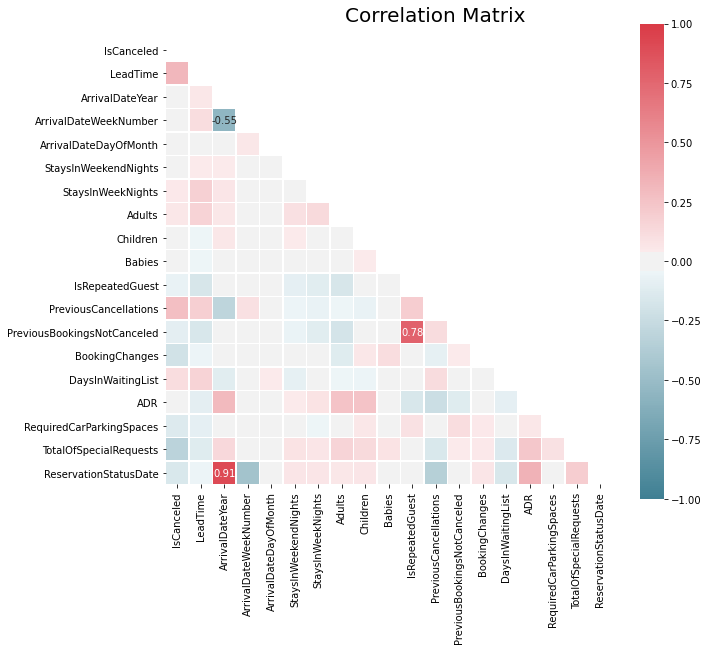

In [13]:
# A way of visualizing the upper table


fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[numeric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr,mask = mask, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)


plt.show()

In [14]:
#data[numeric_features].apply(pd.to_numeric)

In [15]:
data[categorical_features]

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Company,CustomerType,ReservationStatus
0,July,HB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,NULL,Transient,Check-Out
1,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,NULL,Transient,Canceled
2,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,NULL,Transient,Canceled
3,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,NULL,Transient,Canceled
4,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,NULL,Transient,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
79325,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,NULL,Transient,Check-Out
79326,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,NULL,Transient,Check-Out
79327,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,NULL,Transient,Check-Out
79328,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,NULL,Transient,Check-Out


In [16]:
#Drop ReservationStatusDate, due the high correlation with other variables

data.drop(['ReservationStatusDate','DepositType','ReservationStatus'], axis=1, inplace = True)

numeric_features = ['IsCanceled','LeadTime','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','IsRepeatedGuest','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','Agent','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']
categorical_features = data.columns.drop(numeric_features).to_list()

In [17]:
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,A,0,6,NULL,0,Transient,0.00,0,0
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,A,0,9,NULL,0,Transient,76.50,0,1
2,1,65,2015,July,27,1,0,4,1,0.0,...,A,A,0,9,NULL,0,Transient,68.00,0,1
3,1,92,2015,July,27,1,2,4,2,0.0,...,A,A,0,9,NULL,0,Transient,76.50,0,2
4,1,100,2015,July,27,2,0,2,2,0.0,...,A,A,0,9,NULL,0,Transient,76.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,A,A,0,394,NULL,0,Transient,96.14,0,0
79326,0,102,2017,August,35,31,2,5,3,0.0,...,E,E,0,9,NULL,0,Transient,225.43,0,2
79327,0,34,2017,August,35,31,2,5,2,0.0,...,D,D,0,9,NULL,0,Transient,157.71,0,4
79328,0,109,2017,August,35,31,2,5,2,0.0,...,A,A,0,89,NULL,0,Transient,104.40,0,0


In [19]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

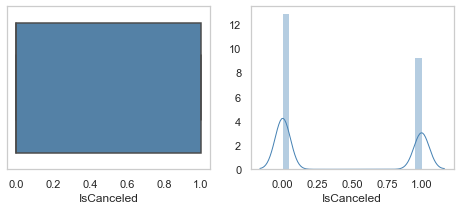

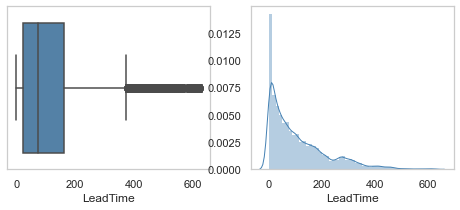

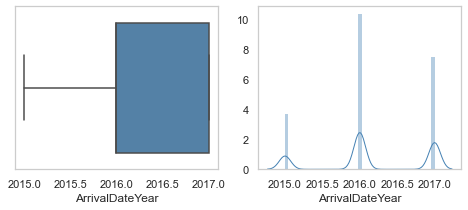

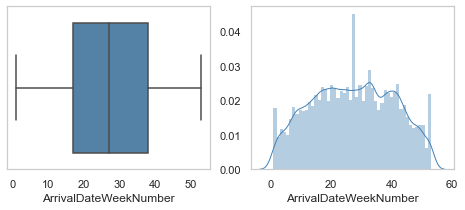

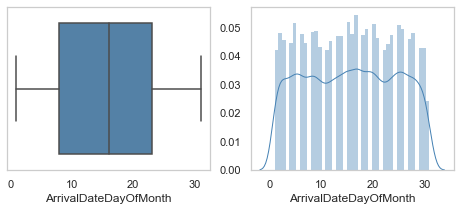

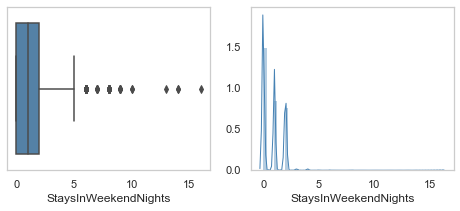

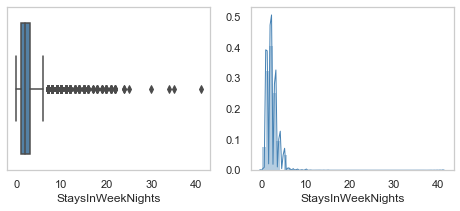

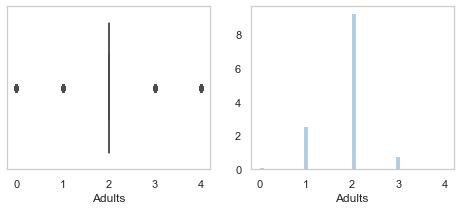

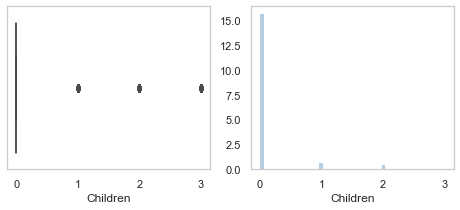

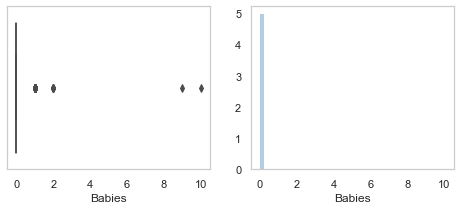

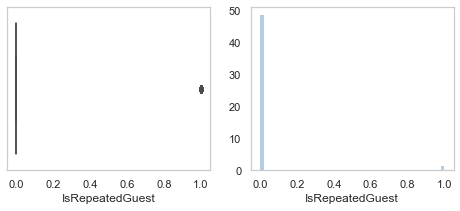

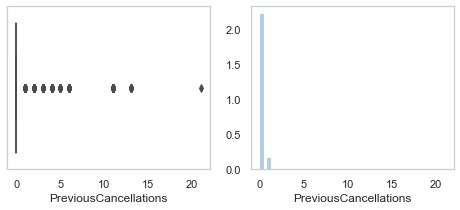

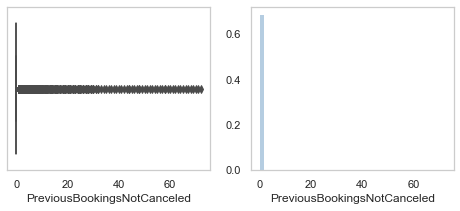

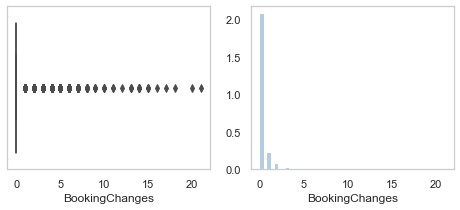

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

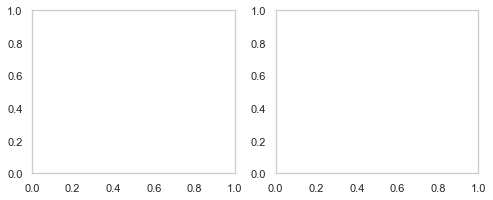

In [20]:
fig_num = 1        
for col in numeric_features:
    hist_box_plot(data,col, fig_num)
    fig_num = fig_num + 1

In [ ]:
sns.set()

# Setting pairgrid
g = sns.PairGrid(data[numeric_features])

# Populating pairgrid
mdg = g.map_diag(plt.hist, edgecolor="w")
mog = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)

plt.show()

<hr>
<a class="anchor" id="4.">
    
# Data Preparation
    
</a>

In [21]:
"       NULL" in data.values

True

In [22]:
# TO work 
data.replace("       NULL", "0", inplace=True)

In [23]:
data.replace("?", np.nan, inplace=True)

In [24]:
data.isna().sum().sort_values()


IsCanceled                      0
ADR                             0
CustomerType                    0
DaysInWaitingList               0
Company                         0
Agent                           0
BookingChanges                  0
AssignedRoomType                0
ReservedRoomType                0
PreviousBookingsNotCanceled     0
PreviousCancellations           0
IsRepeatedGuest                 0
DistributionChannel             0
MarketSegment                   0
Meal                            0
Babies                          0
Adults                          0
StaysInWeekNights               0
StaysInWeekendNights            0
ArrivalDateDayOfMonth           0
ArrivalDateWeekNumber           0
ArrivalDateMonth                0
ArrivalDateYear                 0
LeadTime                        0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
Children                        4
Country                        24
dtype: int64

<hr>
<a class="anchor" id="4.1.">
    
# Missing Values
    
</a>

In [25]:
modes= data.mode().loc[0]


In [26]:
data.fillna(modes,inplace=True)

In [27]:
data.isna().sum().sort_values()

IsCanceled                     0
ADR                            0
CustomerType                   0
DaysInWaitingList              0
Company                        0
Agent                          0
BookingChanges                 0
AssignedRoomType               0
ReservedRoomType               0
PreviousBookingsNotCanceled    0
PreviousCancellations          0
IsRepeatedGuest                0
DistributionChannel            0
MarketSegment                  0
Country                        0
Meal                           0
Babies                         0
Children                       0
Adults                         0
StaysInWeekNights              0
StaysInWeekendNights           0
ArrivalDateDayOfMonth          0
ArrivalDateWeekNumber          0
ArrivalDateMonth               0
ArrivalDateYear                0
LeadTime                       0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64

<hr>
<a class="anchor" id="4.3.">
    
# Data Encoding
    
</a>

In [28]:
df_ohc= data.copy()
df_ohc.head(2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,A,0,6,0,0,Transient,0.0,0,0
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,A,0,9,0,0,Transient,76.5,0,1


In [29]:
data[categorical_features].columns

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'Company', 'CustomerType'],
      dtype='object')

In [30]:
one_hot_feat= ['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
        'Company', 'CustomerType']

In [31]:
ohc= OneHotEncoder(sparse= False)
ohc_feat= ohc.fit_transform(df_ohc[one_hot_feat])
ohc_feat_names= ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df

,x0_April,x0_August,x0_December,x0_February,x0_January,x0_July,x0_June,x0_March,x0_May,x0_November,...,x7_ 489,x7_ 491,x7_ 492,x7_ 494,x7_ 497,x7_0,x8_Contract,x8_Group,x8_Transient,x8_Transient-Party
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
df_ohc = pd.concat([df_ohc.drop(columns=one_hot_feat), ohc_df], axis=1)
df_ohc.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,x7_ 489,x7_ 491,x7_ 492,x7_ 494,x7_ 497,x7_0,x8_Contract,x8_Group,x8_Transient,x8_Transient-Party
0,0,6,2015,27,1,0,2,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,88,2015,27,1,0,4,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,65,2015,27,1,0,4,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,92,2015,27,1,2,4,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,100,2015,27,2,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
data= df_ohc.copy()

In [34]:
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,x7_ 489,x7_ 491,x7_ 492,x7_ 494,x7_ 497,x7_0,x8_Contract,x8_Group,x8_Transient,x8_Transient-Party
0,0,6,2015,27,1,0,2,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,88,2015,27,1,0,4,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,65,2015,27,1,0,4,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,92,2015,27,1,2,4,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,100,2015,27,2,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,35,30,2,5,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79326,0,102,2017,35,31,2,5,3,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79327,0,34,2017,35,31,2,5,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79328,0,109,2017,35,31,2,5,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<hr>
<a class="anchor" id="4.4.">
    
#  Handling Outliers
    
</a>

In [35]:
# Ver se o rsultado é melhor e fazer outliers


<hr>
<a class="anchor" id="7.">
    
#  Data splitting
    
</a>

In [36]:
numeric_features = ['IsCanceled','LeadTime','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','IsRepeatedGuest','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','Agent','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']
categorical_features = data.columns.drop(numeric_features).to_list()

In [37]:
dependent= data.iloc[:,:1]
independent= data.loc[ : , data.columns != 'IsCanceled'] 

In [38]:
X_train, X_val, y_train, y_val = train_test_split(independent, 
                                                    dependent, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=dependent
                                                   )

In [39]:
dependent

,IsCanceled
0,0
1,1
2,1
3,1
4,1
...,...
79325,0
79326,0
79327,0
79328,0


In [40]:
independent.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       ...
       'x7_        489', 'x7_        491', 'x7_        492', 'x7_        494',
       'x7_        497', 'x7_0', 'x8_Contract', 'x8_Group', 'x8_Transient',
       'x8_Transient-Party'],
      dtype='object', length=442)

<hr>
<a class="anchor" id="9.">
    
# Data Normalization
    
</a>

In [41]:
numeric_features = ['LeadTime','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','IsRepeatedGuest','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','Agent','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']
categorical_features = data.columns.drop(numeric_features).to_list()

In [42]:
norm_train= X_train.copy()

In [43]:
scaler = StandardScaler().fit(X_train[numeric_features]) #MinMaxScaler
scaled_train = scaler.transform(X_train[numeric_features])
norm_train[numeric_features]= scaled_train
norm_val= X_val.copy()
scaled_val= scaler.transform(X_val[numeric_features])
norm_val[numeric_features]=scaled_val

In [44]:
new_Xtrain = norm_train.copy()
new_ytrain = y_train.copy()
new_X_val = norm_val.copy()
new_y_val = y_val.copy()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score

In [48]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [56]:
n_estimators = [125]
max_depth = list(range(25,38,5))
min_samples_split = list(range(15,35,5))
forest= RandomForestClassifier()

min_samples_leaf = [1, 2] 
bootstrap= ['true','false']
class_weight= [{0: w} for w in [1]]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,bootstrap=bootstrap, class_weight=class_weight)


clf = GridSearchCV(forest, hyperF, scoring='accuracy' ,n_jobs = -1,verbose=2)


clf.fit(new_Xtrain, new_ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 30.2min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['true', 'false'],
                         'class_weight': [{0: 1}], 'max_depth': [25, 30, 35],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [15, 20, 25, 30],
                         'n_estimators': [125]},
             scoring='accuracy', verbose=2)

In [57]:
clf.best_params_

{'bootstrap': 'false',
 'class_weight': {0: 1},
 'max_depth': 35,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 125}

In [58]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'bootstrap': 'false', 'class_weight': {0: 1}, 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 125}
------------------------------------------------------------------------------------------------------------------------
0.866 (+/-0.001) for {'bootstrap': 'true', 'class_weight': {0: 1}, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 125}
0.864 (+/-0.001) for {'bootstrap': 'true', 'class_weight': {0: 1}, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 125}
0.862 (+/-0.001) for {'bootstrap': 'true', 'class_weight': {0: 1}, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 125}
0.861 (+/-0.001) for {'bootstrap': 'true', 'class_weight': {0: 1}, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimat

In [59]:
w= 2
regressor = RandomForestClassifier(n_estimators=125, random_state=0,bootstrap='true',
                                   class_weight={0:1},max_features='sqrt', max_depth= 35,
                                  min_samples_leaf=1, min_samples_split= 15 )

regressor.fit(new_Xtrain, y_train)
y_forest_train= regressor.predict(new_Xtrain)
y_forest_val = regressor.predict(new_X_val)

In [60]:
metrics(y_train, y_forest_train, y_val, y_forest_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     36982
           1       0.94      0.84      0.89     26482

    accuracy                           0.91     63464
   macro avg       0.92      0.90      0.91     63464
weighted avg       0.92      0.91      0.91     63464

[[35630  1352]
 [ 4112 22370]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [63]:
recall_score(y_val, y_forest_val, average='binary')

0.7876132930513595